# data pipelines

In [4]:
#!pwd

/home/rc/version-cv/sandbox


In [18]:
!ls ../data/googleresearch/mathwriting/data/**/*.parquet

ls: cannot access '../data/googleresearch/mathwriting/data/**/*.parquet': No such file or directory


In [5]:
import os
from glob import glob
import sys
sys.path.append("../modules")

# Expand ~
parquet_path = os.path.expanduser("~/version-cv/data/googleresearch/mathwriting/data/*.parquet")
print(parquet_path)

/home/rc/version-cv/data/googleresearch/mathwriting/data/*.parquet


In [18]:
import os
from glob import glob
import sys
sys.path.append("../modules")

# Expand ~
parquet_path = os.path.expanduser("/home/rc/version-cv/data/googleresearch/mathwriting/data/*.parquet")

# Check glob
file_list = glob(parquet_path, recursive=True)
print(f"Found {len(file_list)} parquet files:")
for f in file_list:
    print("Checking glob:", f)

# Now import and run
from dataloader2 import load_data

print("\nLoading data...")
data = load_data(
    parquet_path="/home/rc/version-cv/data/googleresearch/mathwriting/data/*.parquet",
    target_column="image",
    feature_columns=["split_tag", "latex"],
    test_size=0.2,
    val_size=0.1,
    verbose=True
)

X_train, X_val, y_train, y_val, X_test = data["parquet_splits"]
print("\nData Loaded:")
print(X_train.head())
print(y_train.head())

Found 5 parquet files:
Checking glob: /home/rc/version-cv/data/googleresearch/mathwriting/data/train-00002-of-00003-42472859069c07bc.parquet
Checking glob: /home/rc/version-cv/data/googleresearch/mathwriting/data/val-00000-of-00001-184984e66f80ed7a.parquet
Checking glob: /home/rc/version-cv/data/googleresearch/mathwriting/data/test-00000-of-00001-694f317d8b634199.parquet
Checking glob: /home/rc/version-cv/data/googleresearch/mathwriting/data/train-00001-of-00003-589d2b65116e09aa.parquet
Checking glob: /home/rc/version-cv/data/googleresearch/mathwriting/data/train-00000-of-00003-ab0ae6b9fa4a3f06.parquet

Loading data...
Found 5 parquet files. Loading individually...
Loading /home/rc/version-cv/data/googleresearch/mathwriting/data/train-00002-of-00003-42472859069c07bc.parquet ...
Loading /home/rc/version-cv/data/googleresearch/mathwriting/data/val-00000-of-00001-184984e66f80ed7a.parquet ...
Loading /home/rc/version-cv/data/googleresearch/mathwriting/data/test-00000-of-00001-694f317d8b634

In [25]:
sample_df = X_train.copy()
sample_df["image"] = y_train

# Example: pick first 5 train images
sample_subset = sample_df.head(5)

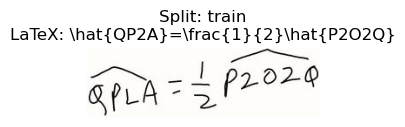

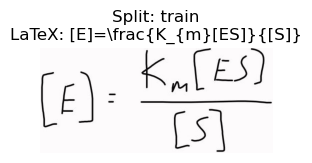

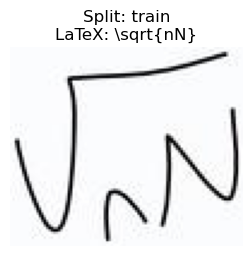

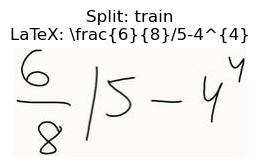

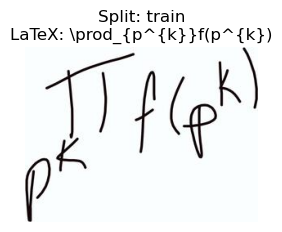

In [28]:
from PIL import Image
import io
import matplotlib.pyplot as plt

for idx, row in sample_subset.iterrows():
    image_bytes = row["image"]["bytes"]
    latex_formula = row["latex"]
    split = row["split_tag"]

    img = Image.open(io.BytesIO(image_bytes))
    
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Split: {split}\nLaTeX: {latex_formula}")
    plt.show()

In [27]:
# Example: only "val" images with certain latex
val_subset = sample_df[(sample_df["split_tag"] == "val") & (sample_df["latex"].str.contains("sqrt"))]

print(val_subset.head())

Empty DataFrame
Columns: [split_tag, latex, image]
Index: []


In [21]:
from datasets import load_dataset

ds = load_dataset("deepcopy/MathWriting-Human")
sample = ds["train"][0]
image = sample["image"]
latex = sample["latex"]

README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00003-ab0ae6b9fa4a3f(…):   0%|          | 0.00/373M [00:00<?, ?B/s]

data/train-00001-of-00003-589d2b65116e09(…):   0%|          | 0.00/374M [00:00<?, ?B/s]

data/train-00002-of-00003-42472859069c07(…):   0%|          | 0.00/373M [00:00<?, ?B/s]

data/test-00000-of-00001-694f317d8b63419(…):   0%|          | 0.00/44.9M [00:00<?, ?B/s]

data/val-00000-of-00001-184984e66f80ed7a(…):   0%|          | 0.00/81.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/229864 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7644 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/15674 [00:00<?, ? examples/s]

In [24]:
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=187x141 at 0x7E91542C94C0>


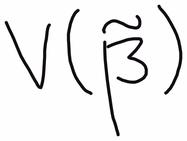

V(\tilde{\beta})


In [30]:
sample = ds["train"][0]
image = sample["image"]
latex = sample["latex"]

display(image)
print(latex)

In [31]:
train_set = ds["train"].filter(lambda x: x["split_tag"] == "train")
val_set = ds["train"].filter(lambda x: x["split_tag"] == "val")

Filter:   0%|          | 0/229864 [00:00<?, ? examples/s]

Filter:   0%|          | 0/229864 [00:00<?, ? examples/s]

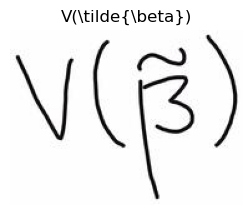

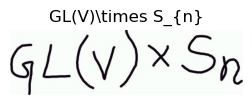

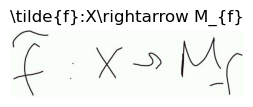

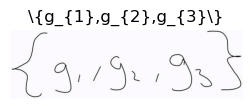

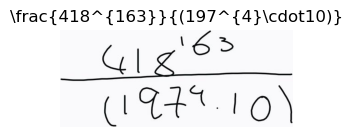

In [32]:
import matplotlib.pyplot as plt

for i in range(5):
    img = train_set[i]["image"]
    latex_str = train_set[i]["latex"]
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.axis("off")
    plt.title(latex_str)
    plt.show()